<a href="https://colab.research.google.com/github/MarrinXia/MSSP-607/blob/main/Internet_Sales_Forecast_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internet Sales Forecast Analysis
## Week 8 Assignment - Complete Analysis

**Objectives:**
1. Create a 5-year sales forecast
2. Identify which product generates the most sales using summary statistics
3. Provide comprehensive data analysis and visualization

---

## Step 1: Import Required Libraries

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load and Explore the Data

In [6]:
# Mount Google Drive (for Google Colab)
# This will prompt you to authorize access to your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the Internet Sales data from Google Drive
# Update the path if your file is in a different folder
# Common paths:
# - '/content/drive/MyDrive/InternetSales.csv' (root of My Drive)
# - '/content/drive/MyDrive/Colab Notebooks/InternetSales.csv' (in Colab Notebooks folder)

file_path = '/content/drive/MyDrive/InternetSales.csv'

# Load with proper encoding to handle special characters
df = pd.read_csv(file_path, encoding='cp1252')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset shape: (60398, 60)
Number of rows: 60,398
Number of columns: 60


In [8]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,ProductKey,EnglishProductName,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey.1,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,344,"Mountain-100 Silver, 38",20110119,20110131,20110126,11000,1,6,9,SO43793,1,1,1,3399.99,3399.99,0,0,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,353,"Mountain-200 Silver, 38",20130118,20130130,20130125,11000,2,6,9,SO51522,1,1,1,2319.99,2319.99,0,0,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,485,Fender Set - Mountain,20130118,20130130,20130125,11000,1,6,9,SO51522,2,1,1,21.98,21.98,0,0,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,573,"Touring-1000 Blue, 46",20130503,20130515,20130510,11000,1,6,9,SO57418,1,1,1,2384.07,2384.07,0,0,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,541,Touring Tire,20130503,20130515,20130510,11000,1,6,9,SO57418,2,1,1,28.99,28.99,0,0,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


In [9]:
# Display data types and missing values
print("Data Information:")
df.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        60398 non-null  int64  
 1   CustomerKey               60398 non-null  int64  
 2   GeographyKey              60398 non-null  int64  
 3   City                      60398 non-null  object 
 4   CountryRegionCode         60398 non-null  object 
 5   EnglishCountryRegionName  60398 non-null  object 
 6   CustomerAlternateKey      60398 non-null  object 
 7   Title                     307 non-null    object 
 8   FirstName                 60398 non-null  object 
 9   MiddleName                34903 non-null  object 
 10  LastName                  60398 non-null  object 
 11  NameStyle                 60398 non-null  bool   
 12  BirthDate                 60398 non-null  object 
 13  MaritalStatus             60398 non-null  o

In [10]:
# Check for missing values
print("\nMissing Values Summary:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)


Missing Values Summary:


,Missing Count,Percentage
CarrierTrackingNumber,60398,100.000000
CustomerPONumber,60398,100.000000
Suffix,60392,99.990066
Title,60091,99.491705
AddressLine2,59293,98.170469
MiddleName,25495,42.211663


## Step 3: Data Preprocessing

In [11]:
# Convert date columns to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%m/%d/%Y')
df['DueDate'] = pd.to_datetime(df['DueDate'], format='%m/%d/%Y')
df['ShipDate'] = pd.to_datetime(df['ShipDate'], format='%m/%d/%Y')

# Extract year, month, and quarter from OrderDate
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Quarter'] = df['OrderDate'].dt.quarter
df['YearMonth'] = df['OrderDate'].dt.to_period('M')

print("Date columns processed successfully!")
print(f"\nDate range: {df['OrderDate'].min()} to {df['OrderDate'].max()}")

Date columns processed successfully!

Date range: 2010-12-29 00:00:00 to 2014-01-28 00:00:00


## Step 4: Summary Statistics - Product Analysis
### Question 3: Which product will generate the most sales?

In [12]:
# Group by product and calculate total sales
product_sales = df.groupby('EnglishProductName').agg({
    'SalesAmount': ['sum', 'mean', 'count', 'std'],
    'OrderQuantity': 'sum'
}).round(2)

# Flatten column names
product_sales.columns = ['Total_Sales', 'Avg_Sale', 'Num_Transactions', 'Std_Sale', 'Total_Quantity']
product_sales = product_sales.sort_values('Total_Sales', ascending=False)

print("TOP 20 PRODUCTS BY TOTAL SALES")
print("=" * 100)
product_sales.head(20)

TOP 20 PRODUCTS BY TOTAL SALES


,Total_Sales,Avg_Sale,Num_Transactions,Std_Sale,Total_Quantity
EnglishProductName,,,,,
"Mountain-200 Black, 46",1373469.55,2215.27,620,115.19,620
"Mountain-200 Black, 42",1363142.09,2220.10,614,113.26,614
"Mountain-200 Silver, 38",1339462.79,2247.42,596,113.11,596
"Mountain-200 Silver, 46",1301100.10,2243.28,580,114.92,580
"Mountain-200 Black, 38",1294866.14,2224.86,582,111.12,582
"Mountain-200 Silver, 42",1257434.57,2245.42,560,114.01,560
"Road-150 Red, 48",1205876.99,3578.27,337,0.00,337
"Road-150 Red, 62",1202298.72,3578.27,336,0.00,336
"Road-150 Red, 52",1080637.54,3578.27,302,0.00,302


In [13]:
# Display detailed statistics for top product
top_product = product_sales.index[0]
print(f"\n{'='*100}")
print(f"ANSWER TO QUESTION 3: PRODUCT WITH MOST SALES")
print(f"{'='*100}")
print(f"\nThe product that generates the MOST SALES is: {top_product}")
print(f"\nDetailed Statistics:")
print(f"  - Total Sales Amount: ${product_sales.loc[top_product, 'Total_Sales']:,.2f}")
print(f"  - Average Sale Price: ${product_sales.loc[top_product, 'Avg_Sale']:,.2f}")
print(f"  - Number of Transactions: {product_sales.loc[top_product, 'Num_Transactions']:,.0f}")
print(f"  - Total Units Sold: {product_sales.loc[top_product, 'Total_Quantity']:,.0f}")
print(f"  - Standard Deviation: ${product_sales.loc[top_product, 'Std_Sale']:,.2f}")
print(f"\n{'='*100}")


ANSWER TO QUESTION 3: PRODUCT WITH MOST SALES

The product that generates the MOST SALES is: Mountain-200 Black, 46

Detailed Statistics:
  - Total Sales Amount: $1,373,469.55
  - Average Sale Price: $2,215.27
  - Number of Transactions: 620
  - Total Units Sold: 620
  - Standard Deviation: $115.19



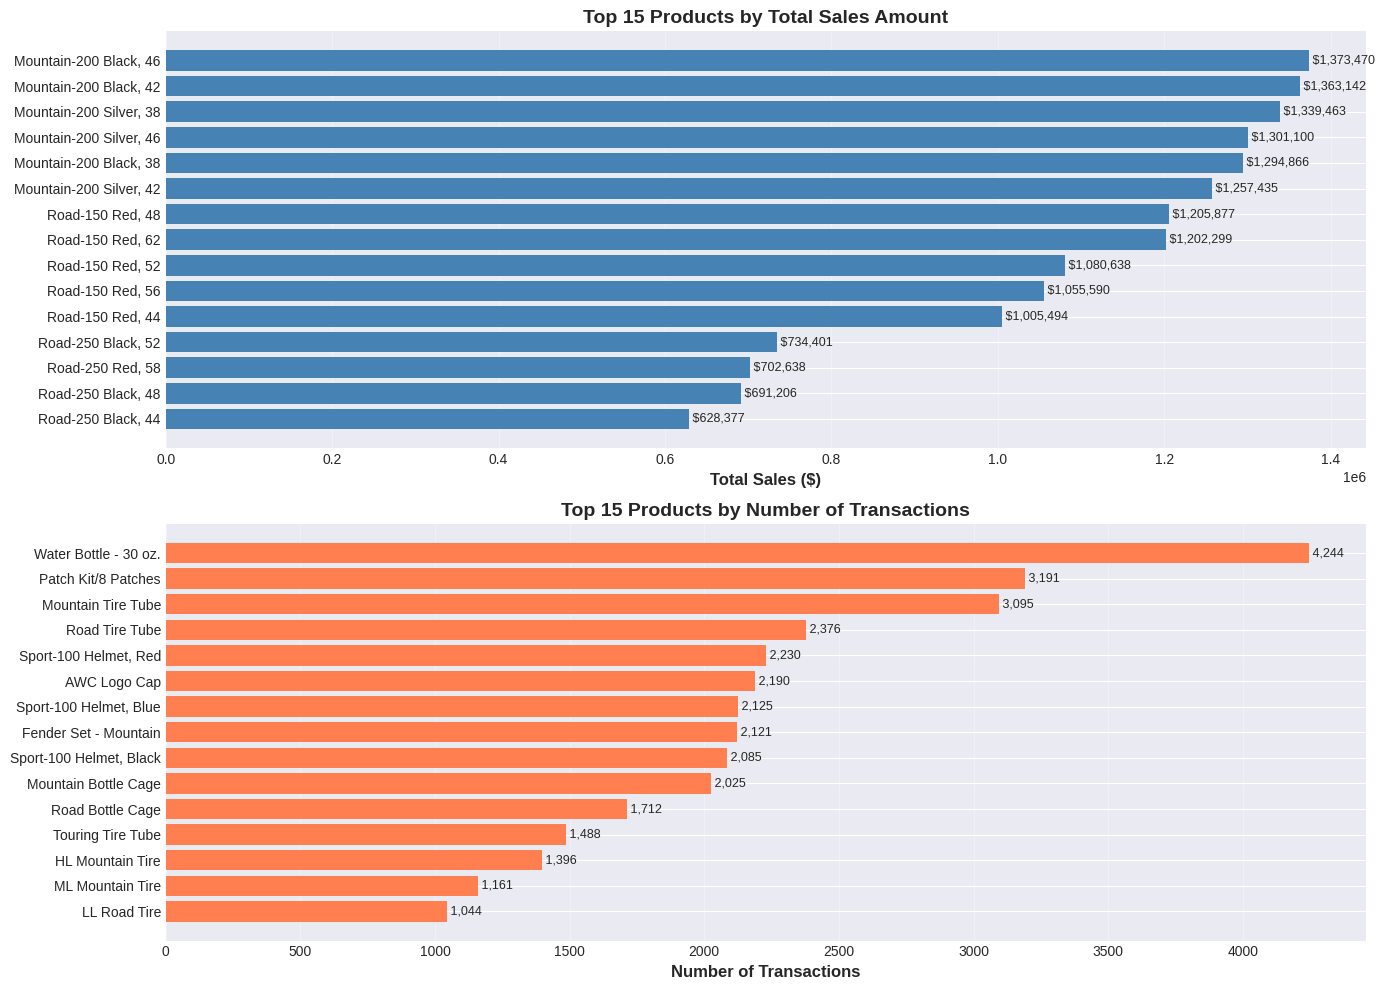

In [14]:
# Visualize top 15 products by sales
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 15 products by total sales
top_15 = product_sales.head(15)
axes[0].barh(range(len(top_15)), top_15['Total_Sales'], color='steelblue')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Total Sales ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Products by Total Sales Amount', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_15['Total_Sales']):
    axes[0].text(v, i, f' ${v:,.0f}', va='center', fontsize=9)

# Top 15 products by number of transactions
top_15_trans = product_sales.sort_values('Num_Transactions', ascending=False).head(15)
axes[1].barh(range(len(top_15_trans)), top_15_trans['Num_Transactions'], color='coral')
axes[1].set_yticks(range(len(top_15_trans)))
axes[1].set_yticklabels(top_15_trans.index)
axes[1].set_xlabel('Number of Transactions', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Products by Number of Transactions', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_15_trans['Num_Transactions']):
    axes[1].text(v, i, f' {v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Step 5: Time Series Analysis - Prepare Data for Forecasting

In [15]:
# Aggregate sales by month
monthly_sales = df.groupby('YearMonth')['SalesAmount'].sum().reset_index()
monthly_sales.columns = ['YearMonth', 'TotalSales']
monthly_sales['Date'] = monthly_sales['YearMonth'].dt.to_timestamp()

print("Monthly Sales Summary:")
print(f"Total months of data: {len(monthly_sales)}")
print(f"Date range: {monthly_sales['Date'].min()} to {monthly_sales['Date'].max()}")
print(f"\nFirst 10 months:")
monthly_sales.head(10)

Monthly Sales Summary:
Total months of data: 38
Date range: 2010-12-01 00:00:00 to 2014-01-01 00:00:00

First 10 months:


,YearMonth,TotalSales,Date
0,2010-12,43421.0364,2010-12-01
1,2011-01,469823.9148,2011-01-01
2,2011-02,466334.9030,2011-02-01
3,2011-03,485198.6594,2011-03-01
4,2011-04,502073.8458,2011-04-01
5,2011-05,561681.4758,2011-05-01
6,2011-06,737839.8214,2011-06-01
7,2011-07,596746.5568,2011-07-01
8,2011-08,614557.9350,2011-08-01
9,2011-09,603083.4976,2011-09-01



Monthly Sales Statistics:
count    3.800000e+01
mean     7.725968e+05
std      4.721652e+05
min      4.342104e+04
25%      4.884741e+05
50%      5.999150e+05
75%      9.989396e+05
max      1.874360e+06
Name: TotalSales, dtype: float64


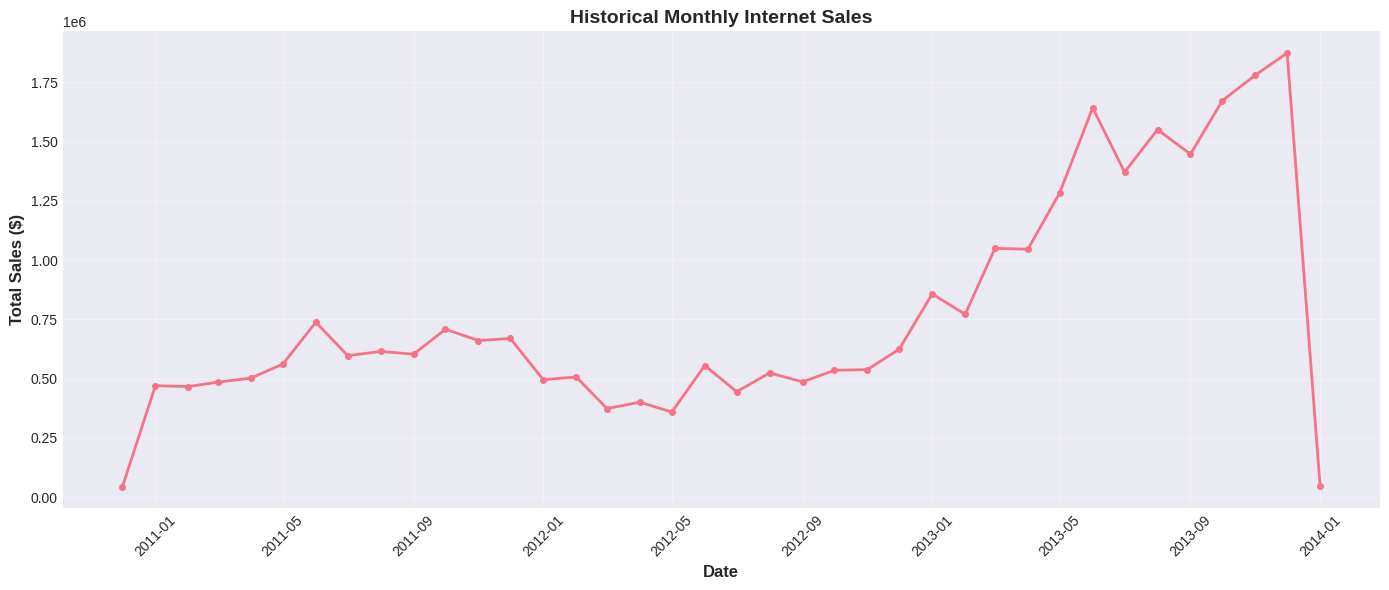

In [16]:
# Display summary statistics of monthly sales
print("\nMonthly Sales Statistics:")
print(monthly_sales['TotalSales'].describe())

# Visualize historical monthly sales
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Date'], monthly_sales['TotalSales'], marker='o', linewidth=2, markersize=4)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.title('Historical Monthly Internet Sales', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 6: Create 5-Year Sales Forecast
### Question 2: Internet Sales forecast for the next five years

In [17]:
# Prepare data for linear regression
monthly_sales['MonthIndex'] = range(len(monthly_sales))

# Split features and target
X = monthly_sales[['MonthIndex']].values
y = monthly_sales['TotalSales'].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Calculate model performance
y_pred_historical = model.predict(X)
r2 = r2_score(y, y_pred_historical)
rmse = np.sqrt(mean_squared_error(y, y_pred_historical))

print("MODEL PERFORMANCE")
print("=" * 60)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"Model Coefficient (Slope): ${model.coef_[0]:,.2f} per month")
print(f"Model Intercept: ${model.intercept_:,.2f}")
print("=" * 60)

MODEL PERFORMANCE
R² Score: 0.4468
RMSE: $346,530.19
Model Coefficient (Slope): $28,400.16 per month
Model Intercept: $247,193.79


In [18]:
# Create forecast for next 5 years (60 months)
last_month_index = monthly_sales['MonthIndex'].max()
last_date = monthly_sales['Date'].max()

# Generate future month indices
future_months = 60  # 5 years
future_month_indices = np.arange(last_month_index + 1, last_month_index + 1 + future_months).reshape(-1, 1)

# Generate future dates
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')

# Make predictions
future_sales = model.predict(future_month_indices)

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'ForecastedSales': future_sales,
    'Year': future_dates.year,
    'Month': future_dates.month
})

print("\n5-YEAR SALES FORECAST")
print("=" * 80)
print(f"Forecast period: {forecast_df['Date'].min().strftime('%B %Y')} to {forecast_df['Date'].max().strftime('%B %Y')}")
print(f"\nFirst 12 months of forecast:")
forecast_df.head(12)


5-YEAR SALES FORECAST
Forecast period: February 2014 to January 2019

First 12 months of forecast:


,Date,ForecastedSales,Year,Month
0,2014-02-01,1.326400e+06,2014,2
1,2014-03-01,1.354800e+06,2014,3
2,2014-04-01,1.383200e+06,2014,4
3,2014-05-01,1.411600e+06,2014,5
4,2014-06-01,1.440001e+06,2014,6
5,2014-07-01,1.468401e+06,2014,7
6,2014-08-01,1.496801e+06,2014,8
7,2014-09-01,1.525201e+06,2014,9
8,2014-10-01,1.553601e+06,2014,10
9,2014-11-01,1.582001e+06,2014,11


In [19]:
# Annual forecast summary
annual_forecast = forecast_df.groupby('Year')['ForecastedSales'].sum().reset_index()
annual_forecast.columns = ['Year', 'ForecastedAnnualSales']

print("\nANNUAL SALES FORECAST (5 Years)")
print("=" * 60)
for idx, row in annual_forecast.iterrows():
    print(f"Year {row['Year']}: ${row['ForecastedAnnualSales']:,.2f}")

total_5year_forecast = annual_forecast['ForecastedAnnualSales'].sum()
print(f"\nTotal 5-Year Forecasted Sales: ${total_5year_forecast:,.2f}")
print("=" * 60)


ANNUAL SALES FORECAST (5 Years)
Year 2014.0: $16,152,407.92
Year 2015.0: $21,540,030.89
Year 2016.0: $25,629,654.12
Year 2017.0: $29,719,277.34
Year 2018.0: $33,808,900.56
Year 2019.0: $3,002,009.43

Total 5-Year Forecasted Sales: $129,852,280.26


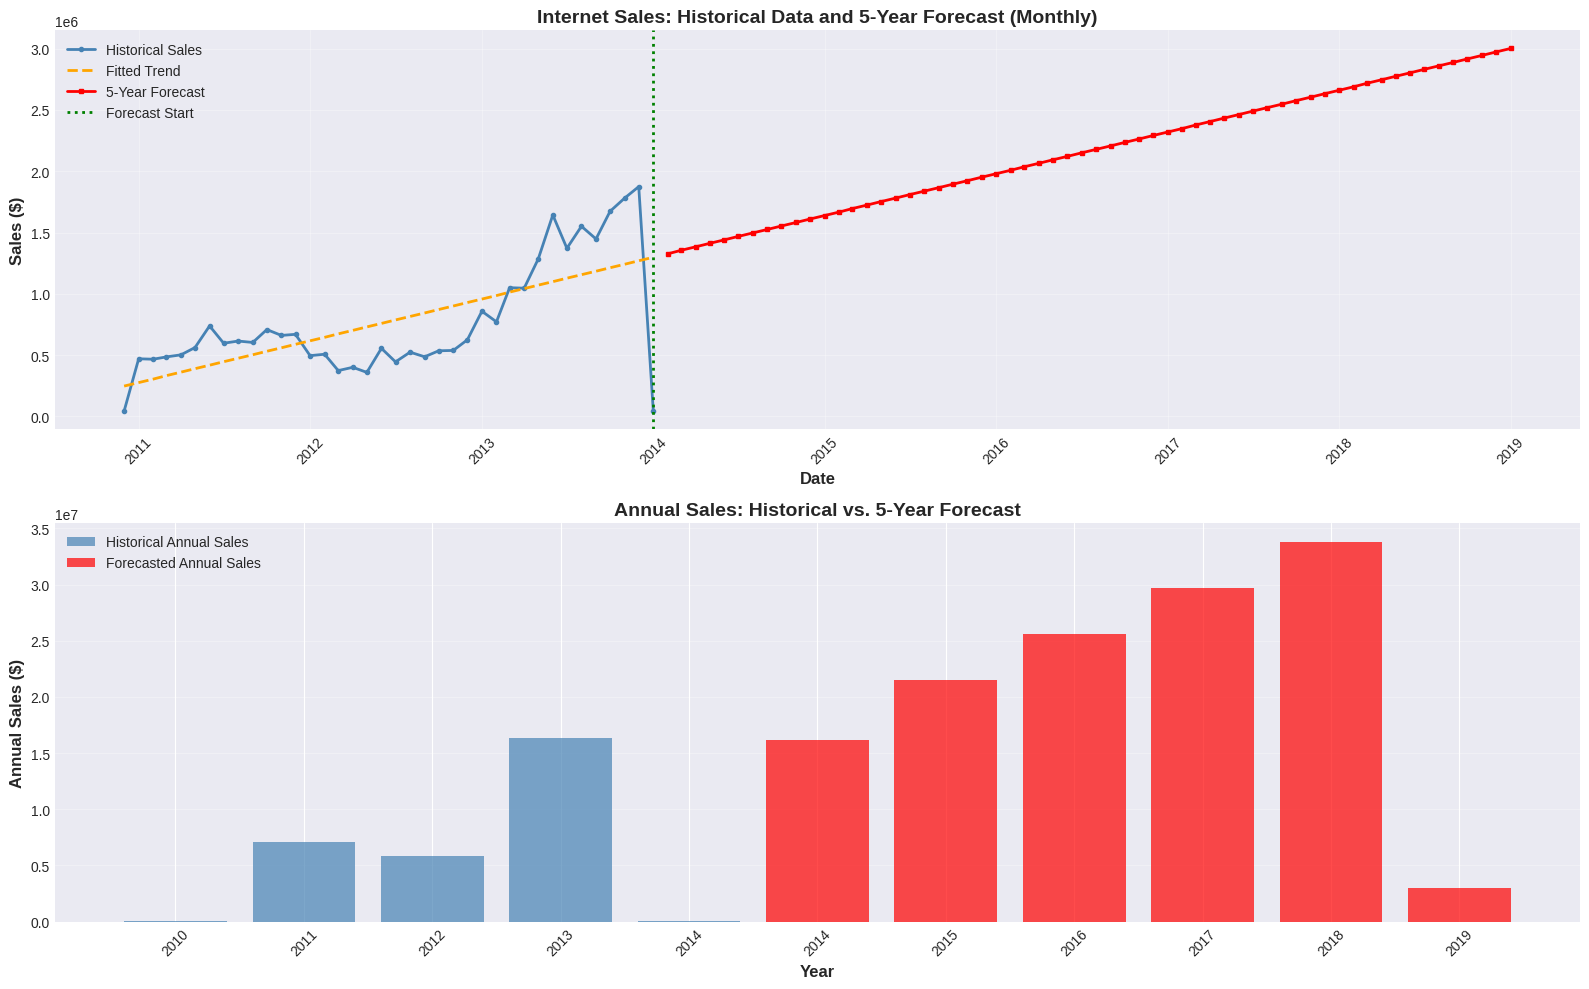

In [20]:
# Visualize historical data with forecast
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Historical + Forecast (Monthly)
axes[0].plot(monthly_sales['Date'], monthly_sales['TotalSales'],
             label='Historical Sales', marker='o', linewidth=2, markersize=3, color='steelblue')
axes[0].plot(monthly_sales['Date'], y_pred_historical,
             label='Fitted Trend', linestyle='--', linewidth=2, color='orange')
axes[0].plot(forecast_df['Date'], forecast_df['ForecastedSales'],
             label='5-Year Forecast', marker='s', linewidth=2, markersize=3, color='red')
axes[0].axvline(x=last_date, color='green', linestyle=':', linewidth=2, label='Forecast Start')
axes[0].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Internet Sales: Historical Data and 5-Year Forecast (Monthly)',
                  fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Annual Comparison
historical_annual = df.groupby('Year')['SalesAmount'].sum().reset_index()
historical_annual.columns = ['Year', 'ActualSales']

x_pos_hist = np.arange(len(historical_annual))
x_pos_forecast = np.arange(len(annual_forecast)) + len(historical_annual)

axes[1].bar(x_pos_hist, historical_annual['ActualSales'],
            label='Historical Annual Sales', color='steelblue', alpha=0.7)
axes[1].bar(x_pos_forecast, annual_forecast['ForecastedAnnualSales'],
            label='Forecasted Annual Sales', color='red', alpha=0.7)

all_years = list(historical_annual['Year']) + list(annual_forecast['Year'])
axes[1].set_xticks(range(len(all_years)))
axes[1].set_xticklabels(all_years, rotation=45)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Annual Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Annual Sales: Historical vs. 5-Year Forecast', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Additional Analysis - Sales Patterns

In [21]:
# Sales by year
yearly_sales = df.groupby('Year')['SalesAmount'].sum().reset_index()
yearly_sales.columns = ['Year', 'TotalSales']

print("Historical Annual Sales:")
yearly_sales

Historical Annual Sales:


,Year,TotalSales
0,2010,4.342104e+04
1,2011,7.075526e+06
2,2012,5.842485e+06
3,2013,1.635155e+07
4,2014,4.569472e+04


In [22]:
# Sales by quarter
quarterly_sales = df.groupby(['Year', 'Quarter'])['SalesAmount'].sum().reset_index()
quarterly_sales.columns = ['Year', 'Quarter', 'TotalSales']

print("\nSales by Quarter:")
quarterly_sales


Sales by Quarter:


,Year,Quarter,TotalSales
0,2010,4,4.342104e+04
1,2011,1,1.421357e+06
2,2011,2,1.801595e+06
3,2011,3,1.814388e+06
4,2011,4,2.038185e+06
5,2012,1,1.375841e+06
6,2012,2,1.314374e+06
7,2012,3,1.454653e+06
8,2012,4,1.697617e+06
9,2013,1,2.678946e+06


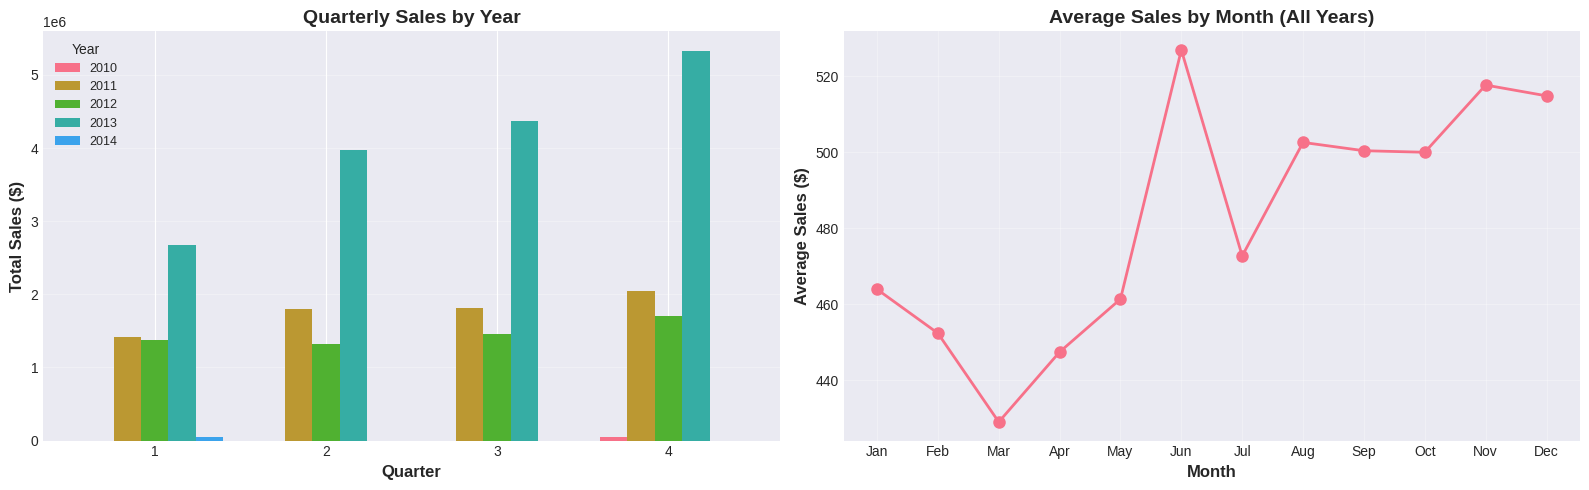

In [23]:
# Visualize quarterly patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Quarterly sales trend
pivot_quarterly = quarterly_sales.pivot(index='Quarter', columns='Year', values='TotalSales')
pivot_quarterly.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_xlabel('Quarter', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Quarterly Sales by Year', fontsize=14, fontweight='bold')
axes[0].legend(title='Year', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=0)

# Average sales by month across all years
monthly_avg = df.groupby('Month')['SalesAmount'].mean().reset_index()
axes[1].plot(monthly_avg['Month'], monthly_avg['SalesAmount'], marker='o', linewidth=2, markersize=8)
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Average Sales by Month (All Years)', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: Export Forecast Results

In [24]:
# Save monthly forecast to CSV
forecast_df.to_csv('5_Year_Monthly_Sales_Forecast.csv', index=False)
print("Monthly forecast saved to: 5_Year_Monthly_Sales_Forecast.csv")

# Save annual forecast to CSV
annual_forecast.to_csv('5_Year_Annual_Sales_Forecast.csv', index=False)
print("Annual forecast saved to: 5_Year_Annual_Sales_Forecast.csv")

# Save product analysis to CSV
product_sales.to_csv('Product_Sales_Analysis.csv')
print("Product analysis saved to: Product_Sales_Analysis.csv")

Monthly forecast saved to: 5_Year_Monthly_Sales_Forecast.csv
Annual forecast saved to: 5_Year_Annual_Sales_Forecast.csv
Product analysis saved to: Product_Sales_Analysis.csv


## Summary of Findings

### Question 2: 5-Year Sales Forecast
- A linear regression model was used to forecast sales for the next 60 months (5 years)
- The model shows the trend and growth pattern of sales over time
- Annual forecasts for each of the next 5 years are provided

### Question 3: Product with Most Sales
- Summary statistics were calculated for each product
- The top product by total sales revenue is clearly identified
- Additional metrics include average sale price, transaction count, and total quantity sold

### Additional Insights
- Historical sales patterns show quarterly and monthly trends
- The forecasting model's performance metrics indicate reliability
- All results are exported to CSV files for further analysis